姓名：白思萌 学号：3120190975 学院：计算机学院

# Video Game Sales 电子游戏销售分析

## 数据准备

数据集主页：https://www.kaggle.com/gregorut/videogamesales

首先，导入数据分析与处理所需的数据模块。

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

将数据集进行导入。

In [2]:
Sales_data = pd.read_csv('vgsales.csv')
print('%d columns' % len(Sales_data.columns))
print('%d rows' % len(Sales_data.index))

11 columns
16598 rows


导入成功。数据共有11列，16598行。取前5行数据进行展示。

In [3]:
Sales_data.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 缺失值处理

对数据进行信息统计。

In [4]:
Sales_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


通过查看，Year-游戏发行的年份,Publisher-游戏的出版者两个字段有缺失，那我们再来计算一下缺失个数。

In [5]:
Sales_data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

可以看到Year缺失271个，Publisher-游戏的出版者缺失58个。考虑到相对总体，缺失的值比较小，我们采取直接删除的方式。

In [6]:
Sales_data = Sales_data.dropna()
Sales_data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

缺失值删除成功。

## 数据分析

### 查看受欢迎的游戏类型、平台、发行商

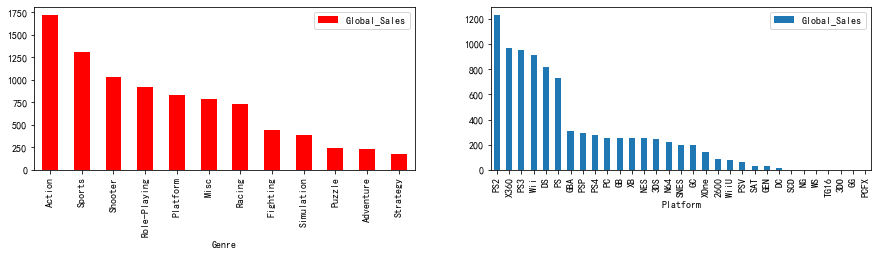

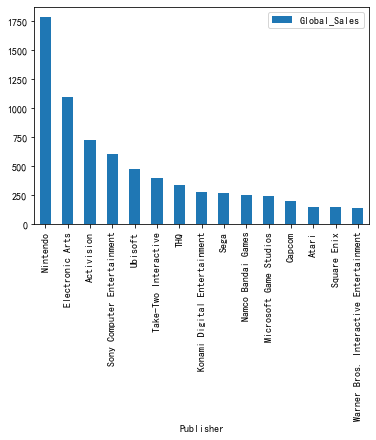

In [7]:
# 获取游戏类型的排序
Genre_data = Sales_data.pivot_table(index = 'Genre',values = 'Global_Sales',aggfunc = np.sum).sort_values('Global_Sales',ascending = False)
# 获取平台类排序
Platform_data = Sales_data.pivot_table(index = 'Platform',values = 'Global_Sales',aggfunc = np.sum).sort_values('Global_Sales',ascending = False)
# 获取发行商类排序
Publisher_data = Sales_data.pivot_table(index = 'Publisher',values = 'Global_Sales',aggfunc = np.sum).sort_values('Global_Sales',ascending = False).iloc[0:15]
# 进行画图
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,3))
Genre_data.plot.bar(color = 'r',ax = ax1)
Platform_data.plot.bar(ax = ax2)
Publisher_data.plot.bar()

从图中我们可以看到动作类和运动类游戏最受欢迎，PS2发行平台是最受欢迎的发行平台，也可以看出最受欢迎的发行商是Nintendo和Electronic Arts。

### 按地区查看不同游戏类型销售额占比情况

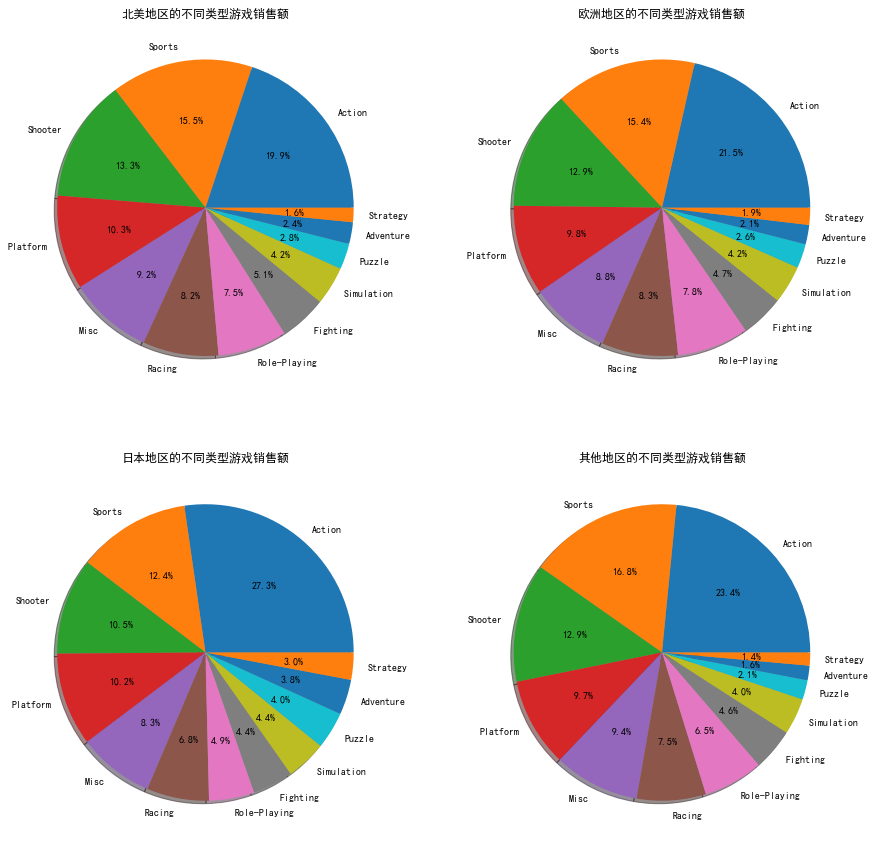

In [8]:
Genre_data_NA = Sales_data.pivot_table(index = ['Genre',],values = 'NA_Sales',aggfunc = np.sum).sort_values('NA_Sales',ascending = False)
Genre_data_EU = Sales_data.pivot_table(index = ['Genre',],values = 'EU_Sales',aggfunc = np.sum).sort_values('EU_Sales',ascending = False)
Genre_data_JP = Sales_data.pivot_table(index = ['Genre',],values = 'JP_Sales',aggfunc = np.sum).sort_values('JP_Sales',ascending = False)
Genre_data_Other = Sales_data.pivot_table(index = ['Genre',],values = 'Other_Sales',aggfunc = np.sum).sort_values('Other_Sales',ascending = False)
Genre_data_NA

data = Genre_data_NA
Genre_name = data._stat_axis.values.tolist()

plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
plt.pie(x = Genre_data_NA,labels = Genre_name,autopct = "%0.1f%%",shadow = True)
plt.title("北美地区的不同类型游戏销售额")
plt.subplot(2,2,2)
plt.pie(x = Genre_data_EU,labels = Genre_name,autopct = "%0.1f%%",shadow = True)
plt.title("欧洲地区的不同类型游戏销售额")
plt.subplot(2,2,3)
plt.pie(x = Genre_data_JP,labels = Genre_name,autopct = "%0.1f%%",shadow = True)
plt.title("日本地区的不同类型游戏销售额")
plt.subplot(2,2,4)
plt.pie(x = Genre_data_Other,labels = Genre_name,autopct = "%0.1f%%",shadow = True)
plt.title("其他地区的不同类型游戏销售额")
plt.show()

以上，是北美、欧洲、日本和其他地区不同类型的游戏销售额占比情况。
可观察到，无论是哪个地区，Action动作类和Sports运动类游戏销售额占比都分别排在第一和第二位，并且其他类别的销售额占比排序基本一致，游戏销售类型在地区之间不存在明显差异。

### 按地区查看不同游戏发行商销售额占比情况

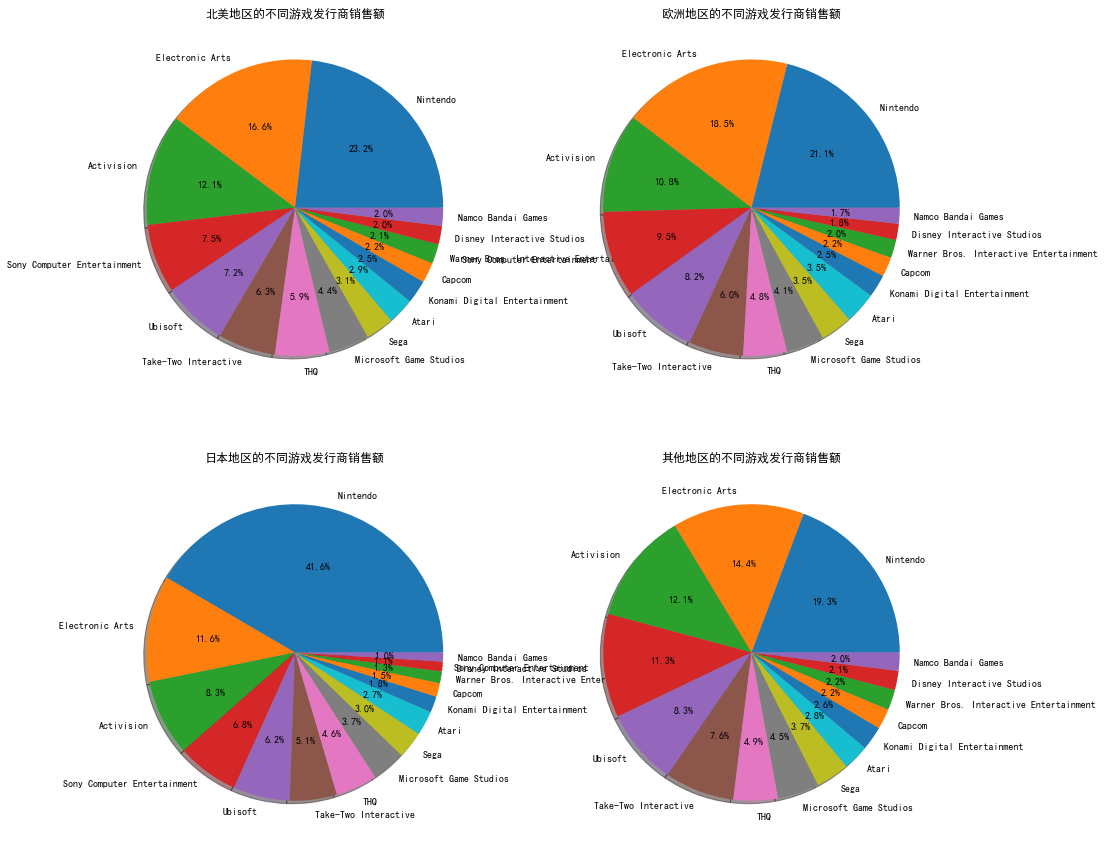

In [9]:
Publisher_data_NA = Sales_data.pivot_table(index = ['Publisher',],values = 'NA_Sales',aggfunc = np.sum).sort_values('NA_Sales',ascending = False).iloc[0:15]
Publisher_data_EU = Sales_data.pivot_table(index = ['Publisher',],values = 'EU_Sales',aggfunc = np.sum).sort_values('EU_Sales',ascending = False).iloc[0:15]
Publisher_data_JP = Sales_data.pivot_table(index = ['Publisher',],values = 'JP_Sales',aggfunc = np.sum).sort_values('JP_Sales',ascending = False).iloc[0:15]
Publisher_data_Other = Sales_data.pivot_table(index = ['Publisher',],values = 'Other_Sales',aggfunc = np.sum).sort_values('Other_Sales',ascending = False).iloc[0:15]
Publisher_data_NA

data = Publisher_data_NA
Publisher_name = data._stat_axis.values.tolist()

plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
plt.pie(x = Publisher_data_NA,labels = Publisher_name,autopct = "%0.1f%%",shadow = True)
plt.title("北美地区的不同游戏发行商销售额")
plt.subplot(2,2,2)
plt.pie(x = Publisher_data_EU,labels = Publisher_name,autopct = "%0.1f%%",shadow = True)
plt.title("欧洲地区的不同游戏发行商销售额")
plt.subplot(2,2,3)
plt.pie(x = Publisher_data_JP,labels = Publisher_name,autopct = "%0.1f%%",shadow = True)
plt.title("日本地区的不同游戏发行商销售额")
plt.subplot(2,2,4)
plt.pie(x = Publisher_data_Other,labels = Publisher_name,autopct = "%0.1f%%",shadow = True)
plt.title("其他地区的不同游戏发行商销售额")
plt.show()

以上，是北美、欧洲、日本和其他地区不同游戏发行商销售额占比情况。（前15名）
可观察到，无论是哪个地区，Nintendo任天堂的销售额占比都排在第一，尤其是日本地区遥遥领先，此处可分析为任天堂为日本公司，因此本土销售工作做的较为优秀。其他发行商的排名地区差异性不大，可认为公司的销售影响力各个地区较为一致。

### 游戏市场的销售趋势

Text(0.5, 1.0, '五大市场发展趋势')

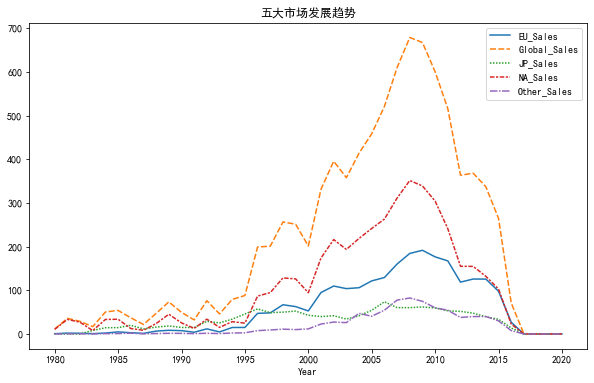

In [10]:
M = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
df5market_p = pd.pivot_table(Sales_data,index = 'Year',values = M,aggfunc = np.sum)
fig = plt.figure(figsize = (10,6))
sns.lineplot(data = df5market_p)
plt.title('五大市场发展趋势')

可看出，从1995年电子游戏销量开始暴涨，2005-2010间数据达到峰值，但是2015年后又开始有所下降。

### 游戏发行商销售趋势（前10名）

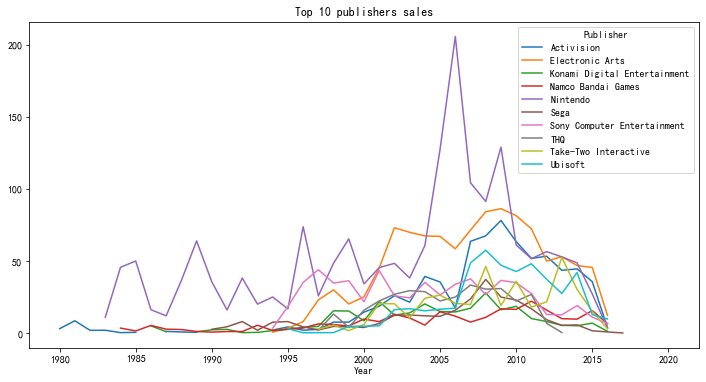

In [11]:
Publisher_10 = Sales_data['Publisher'].value_counts().head(10).index.tolist()
data_Publisher_10 = Sales_data[Sales_data['Publisher'].isin(Publisher_10)]
data_Publisher_10_S = pd.pivot_table(data = data_Publisher_10,index = 'Year',columns = 'Publisher',values = 'Global_Sales',aggfunc = np.sum)
data_Publisher_10_S.plot(title = 'Top 10 publishers sales',figsize = (12,6))

经分析，可看出2005-2010年总体销售高峰，大部分是由于Nintedo任天堂的销量高峰带来的，其他发行商也有所提高，但相比于任天堂而言影响较低。